In [1]:
import PIL

In [2]:
import requests

In [3]:
from io import BytesIO

from IPython import display
from PIL import Image


def display_pil_image(im):
   """Displayhook function for PIL Images, rendered as PNG."""

   b = BytesIO()
   im.save(b, format='png')
   data = b.getvalue()

   ip_img = display.Image(data=data, format='png', embed=True)
   return ip_img._repr_png_()


# register display func with PNG formatter:
png_formatter = get_ipython().display_formatter.formatters['image/png']
dpi = png_formatter.for_type(Image.Image, display_pil_image)

In [4]:
tile_sources = {
    "fs" : "http://caltopo.com/resource/imagery/tiles/sf/{z}/{x}/{y}.png",
    "mb" : "http://caltopo.com/resource/imagery/mapbuilder/cs-60-40-c21BB6100-h22-a21-r22-t22d-m21-p21/{z}/{x}/{y}.png"
}

In [5]:
z = 15
x = 5335
y = 11574

In [6]:
import PIL.Image as Image
import PIL.ImageChops as ImageChops

def clip_image_alpha(image, max_alpha):
    image = image.convert("RGBA")
    red, green, blue, alpha = image.split()
    alpha = ImageChops.darker(alpha, Image.new("L", alpha.size, max_alpha))
    image.putalpha(alpha)
    
    return image

def overlay_image(base, overlay):
    res = base.copy()
    
    r, g, b, a = overlay.split()
    overlay = Image.merge("RGB", (r, g, b))
    mask = Image.merge("L", (a,))
    res.paste(overlay, (0, 0), mask)
    
    return res

tile_images = {}
for s, u in tile_sources.items():
    r = requests.get(u.format(z=z, x=x, y=y))
    r.raise_for_status()
    assert r.headers["Content-Type"] == 'image/png'
    tile_images[s] = Image.open(BytesIO(r.content))
    
composite = overlay_image(tile_images["mb"], clip_image_alpha(tile_images["fs"], 64))

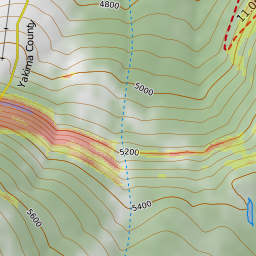

In [8]:
composite